### Calibrating Free Water Samples

djhfkjoidsoifdsoi

In [22]:
import pandas as pd
import numpy as np

raw_water_data = pd.read_csv("data/ProcessedWaterData.csv")

#### Raw Data notes

H2O_MEAN is in millivolts, don't want big swings, big swings indicate that volumes not consistent (700 to 25,000 for example)

autosampler should be consistent ^, swings can indicate a missed injection

for EA data, you need consistent mass, can't have big peak and small peak for different samples, they can bleed into each other

#### Building a Standard Curve
Before we do that, we need to check injection numbers

We did 10 injections but we only care about the last two.
Keep last two injections of every sample, first three are standards
need to delete these to get ride of the memory effects, measurement is sensitive to the measurement of the previous sample.

we average the two injections for every standard

Select all evian samples
use ut2 and pz to build standard curve

analytical precision for 18O is .5, the standard curve applied to the injections should all fall within this precision

### Known Standards O18

In [23]:
EV = -10.3
P2 = 1.73
UT2 = -16.03

### Standard Samples Run by the Continuous Flow

In [24]:
EV1_measured = np.mean(raw_water_data[raw_water_data['Identifier 1']=="EV"]['d(18_16)Mean'].iloc[0:2])
EV2_measured = np.mean(raw_water_data[raw_water_data['Identifier 1']=="EV"]['d(18_16)Mean'].iloc[2:4])
EV3_measured = np.mean(raw_water_data[raw_water_data['Identifier 1']=="EV"]['d(18_16)Mean'].iloc[4:6])
EV4_measured = np.mean(raw_water_data[raw_water_data['Identifier 1']=="EV"]['d(18_16)Mean'].iloc[6:8])

P2_measured = np.mean(raw_water_data[raw_water_data['Identifier 1']=="PZ"]['d(18_16)Mean'].iloc[0:2])
UT2_measured = np.mean(raw_water_data[raw_water_data['Identifier 1']=="UT2"]['d(18_16)Mean'].iloc[0:2])

slope = 0.9821379195929888
intercept = -2.914530221755242


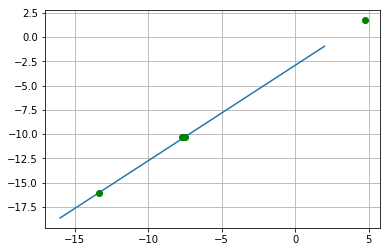

In [25]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# Define the known points
x = [UT2_measured, P2_measured]
y = [UT2, P2]

# Calculate the coefficients. This line answers the initial question. 
coefficients = np.polyfit(x, y, 1)

# Print the findings
print('slope =', coefficients[0])
print('intercept =', coefficients[1])

# Let's compute the values of the line...
polynomial = np.poly1d(coefficients)
x_axis = np.linspace(-16,2,8) # uncalibrated data goes here
y_axis = polynomial(x_axis)

# ...and plot the points and the line
plt.plot(x_axis, y_axis)
plt.plot( x[0], y[0], 'go' )
plt.plot( x[1], y[1], 'go' )
plt.plot( EV1_measured, EV, 'go' )
plt.plot( EV2_measured, EV, 'go' )
plt.plot( EV3_measured, EV, 'go' )
plt.plot( EV4_measured, EV, 'go' )
plt.grid(True)
plt.show()

### Known Standards D

In [26]:
EV_D = -73.5
P2_D = 17.5
UT2_D = -119.81

In [27]:
EV1_D_measured = np.mean(raw_water_data[raw_water_data['Identifier 1']=="EV"]['d(D_H)Mean'].iloc[0:2])
EV2_D_measured = np.mean(raw_water_data[raw_water_data['Identifier 1']=="EV"]['d(D_H)Mean'].iloc[2:4])
EV3_D_measured = np.mean(raw_water_data[raw_water_data['Identifier 1']=="EV"]['d(D_H)Mean'].iloc[4:6])
EV4_D_measured = np.mean(raw_water_data[raw_water_data['Identifier 1']=="EV"]['d(D_H)Mean'].iloc[6:8])

P2_D_measured = np.mean(raw_water_data[raw_water_data['Identifier 1']=="PZ"]['d(D_H)Mean'].iloc[0:2])
UT2_D_measured = np.mean(raw_water_data[raw_water_data['Identifier 1']=="UT2"]['d(D_H)Mean'].iloc[0:2])

slope = 0.9082550601931473
intercept = -17.89152080301629


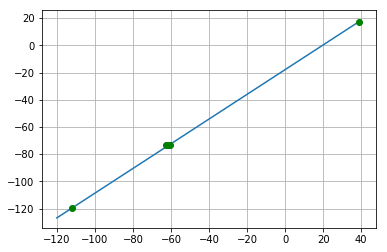

In [28]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# Define the known points
x = [UT2_D_measured, P2_D_measured]
y = [UT2_D, P2_D]

# Calculate the coefficients. This line answers the initial question. 
coefficients_D = np.polyfit(x, y, 1)

# Print the findings
print('slope =', coefficients_D[0])
print('intercept =', coefficients_D[1])

# Let's compute the values of the line...
polynomial = np.poly1d(coefficients_D)
x_axis = np.linspace(-120,40,8) # uncalibrated data goes here
y_axis = polynomial(x_axis)

# ...and plot the points and the line
plt.plot(x_axis, y_axis)
plt.plot( x[0], y[0], 'go' )
plt.plot( x[1], y[1], 'go' )
plt.plot( EV1_D_measured, EV_D, 'go' )
plt.plot( EV2_D_measured, EV_D, 'go' )
plt.plot( EV3_D_measured, EV_D, 'go' )
plt.plot( EV4_D_measured, EV_D, 'go' )
plt.grid(True)
plt.show()

### Subsetting data for our Free water samples

In [29]:
free_water_samples = raw_water_data[raw_water_data['Identifier 1'].str.contains('G')]

dDmeans = free_water_samples['d(D_H)Mean'].groupby(np.arange(len(free_water_samples))//2).mean()

d18Omeans = free_water_samples['d(18_16)Mean'].groupby(np.arange(len(free_water_samples))//2).mean()

In [30]:
corrected_d18O = d18Omeans*coefficients[0]+coefficients[1]

In [31]:
corrected_dD = dDmeans*coefficients_D[0]+coefficients_D[1]

### Plotting the Local Meteoric Water Line with the D and O18 for our samples

delataH = 7.87*delta180+7.0

In [44]:
point_labels = ['Snow (Silver Lake)',
'Upstream (Silver Lake)',
'Tributary',
'Tributary',
'Middle Stream (Donut Falls)',
'Tributary',
'Spring',
'Tributary',
'Downtream (Canyon Base)']

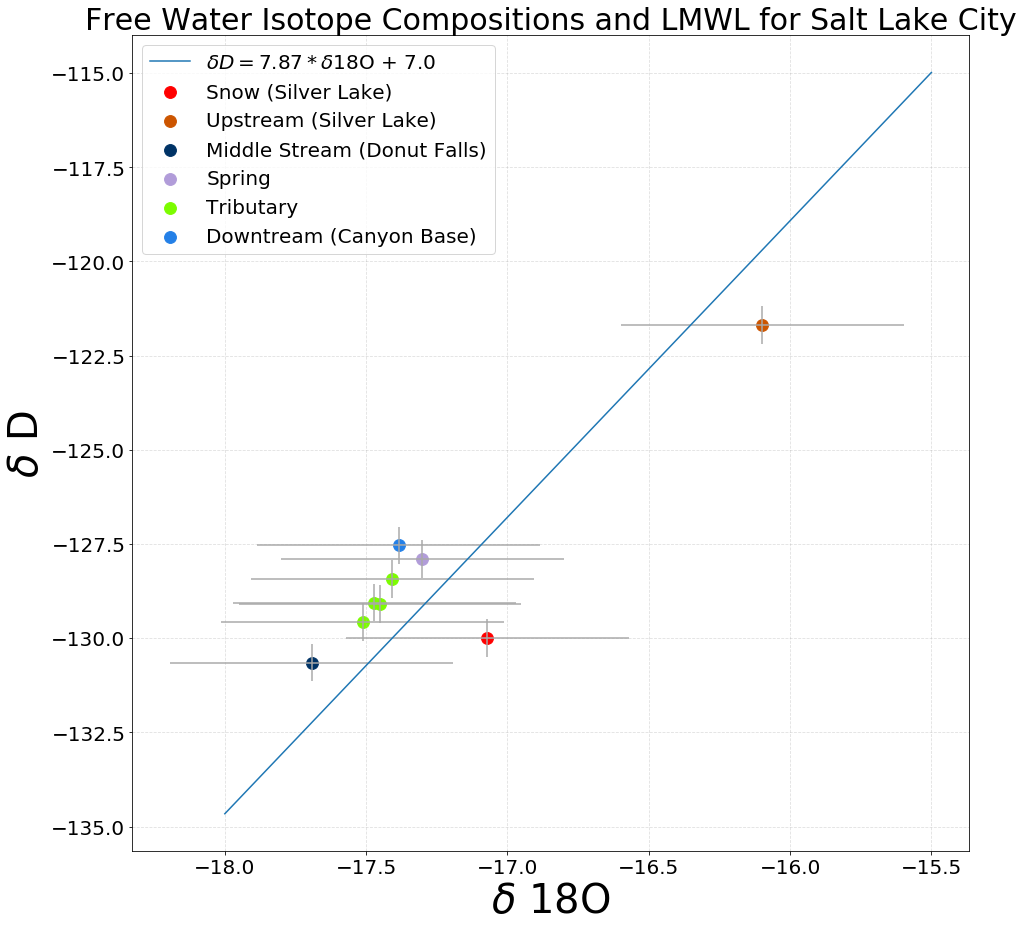

In [45]:
fig, ax = plt.subplots(figsize=(15,15))
# Let's compute the values of the line...
coefficients = [7.87,7.0]
polynomial = np.poly1d(coefficients)
x_axis = np.linspace(-18,-15.5,8) # uncalibrated data goes here
y_axis = polynomial(x_axis)

# ...and plot the points and the line
ax.plot(x_axis, y_axis, label=r'$\delta D= 7.87 * \delta$18O + 7.0')
# plotting free water points
colors = ['#FF0000', '#cc5500', '#7CFC00','#7CFC00','#003366','#7CFC00','#B19CD9','#7CFC00','#2480e7']
i = 0
for label, color in zip(point_labels, colors):
    if i != 2 and i !=3 and i!=5:
        ax.scatter(corrected_d18O[i], corrected_dD[i], c=color, label=label, s=140)
        ax.errorbar(corrected_d18O[i], corrected_dD[i], xerr=.5, yerr=.5, ecolor = "#A9A9A9")
    else:
        ax.scatter(corrected_d18O[i], corrected_dD[i], c=color, s=140)
        ax.errorbar(corrected_d18O[i], corrected_dD[i],  xerr=.5, yerr=.5, ecolor = "#A9A9A9")
    i+=1
# Add X and y Label
ax.tick_params(labelsize=20)
plt.xlabel(r'$\delta$ 18O', fontsize=40)
plt.ylabel(r'$\delta$ D', fontsize=40)

# Add a grid
ax.grid(alpha=.4,linestyle='--')

# Add a Legend
ax.legend(fontsize=20)
plt.title("Free Water Isotope Compositions and LMWL for Salt Lake City", fontsize=30)
plt.savefig("figures/freewater_local_wl.png")

### Cleaning Historical Isotope Data for comparison with Water Extraction

In [53]:
historical_water = pd.read_csv("data/utah_freewater_isotopes_200-2019/1560542436-data.csv").dropna(subset=['d2H', 'd18O', 'Collection_Date'])

/home/rave/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (7,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [69]:
historical_water.loc[(historical_water['Latitude'] >= 40.53060269) & \
                     (historical_water['Latitude'] <= 40.73060269) & \
                     (historical_water['Longitude'] >= -111.70638889) & \
                    (historical_water['Longitude'] <= -111.50638889)]

,Site_Name,Latitude,Longitude,Elevation_mabsl,Site_Comments,Sample_ID,Type,Start_Date,Start_Time_Zone,Collection_Date,Collection_Time_Zone,Phase,Depth_meters,Sample_Comments,d2H,d18O,d2H_Analytical_SD,d18O_Analytical_SD,WI_Analysis_Source,Project_ID
27807,(D- 2- 4) 8cab-S1,40.660228,-111.521864,328.818898,NaN,403937111311601.1,Spring,NaN,NaN,1995-03-13 10:30:00,-8.0,NaN,NaN,"Sample labelled WG, suspected spring water bas...",-131.000000,-17.550000,NaN,NaN,NaN,210
27817,(D- 2- 4) 8aaa- 1,40.668006,-111.511308,318.897638,NaN,404005111303801.1,Ground,NaN,NaN,1995-02-07 16:00:00,-8.0,NaN,14.1732,NaN,-129.000000,-17.460000,NaN,NaN,NaN,210
27852,(D- 1- 3)35dba- 1,40.689116,-111.574923,349.606299,NaN,404121111342701.1,Ground,NaN,NaN,1995-02-06 13:00:00,-8.0,NaN,21.0709,NaN,-130.000000,-17.580000,NaN,NaN,NaN,210
27853,(D- 1- 2)36dab-S1,40.689115,-111.666316,342.047244,NaN,404121111395601.1,Spring,NaN,NaN,1992-01-01 12:00:00,-8.0,NaN,NaN,"Sample labelled WG, suspected spring water bas...",-132.000000,-17.600000,NaN,NaN,NaN,210
27855,(D- 1- 3)35daa- 1,40.690505,-111.569923,338.267717,NaN,404126111340901.1,Ground,NaN,NaN,1995-02-06 10:00:00,-8.0,NaN,19.3228,NaN,-133.000000,-18.000000,NaN,NaN,NaN,210
27860,(D- 1- 3)36aad-S1,40.695782,-111.551867,318.425197,NaN,404145111330401.1,Spring,NaN,NaN,1995-02-27 17:00:00,-8.0,NaN,NaN,"Sample labelled WG, suspected spring water bas...",-130.000000,-17.470000,NaN,NaN,NaN,210
27865,(D- 1- 4)29dcc- 2,40.699116,-111.519087,304.251969,NaN,404157111311001.1,Ground,NaN,NaN,1995-03-14 14:00:00,-8.0,NaN,7.1811,NaN,-129.000000,-17.210000,NaN,NaN,NaN,210
27872,(D- 1- 4)30cba- 1,40.704116,-111.545200,306.141732,NaN,404205111322401.1,Ground,NaN,NaN,1995-01-25 14:00:00,-8.0,NaN,23.622,NaN,-134.000000,-17.850000,NaN,NaN,NaN,210
27914,(D- 1- 4)18cda- 1,40.729393,-111.540756,299.527559,NaN,404346111322401.1,Ground,NaN,NaN,1995-01-25 10:45:00,-8.0,NaN,4.72441,NaN,-126.000000,-16.790000,NaN,NaN,NaN,210
51846,2. Big and Little Cottonwood,40.642270,-111.684590,NaN,BCC near large pulllout,isomap_424919,River_or_stream,NaN,NaN,2011-06-18 00:00:00,NaN,liquid,NaN,NaN,-128.000000,-17.100000,NaN,NaN,NaN,73


In [46]:
pd.read_excel("data/utah_freewater_isotopes_200-2019/HeaderDescriptions.xlsx")

,Data header description,Unnamed: 1,Unnamed: 2,Unnamed: 3,Project header description,Unnamed: 5,Unnamed: 6
0,Column header,Description,Example,NaN,Column header,Description,Example
1,Site_Name,A general name for the site,Brighton stream,NaN,Project_ID,Unique project identifier,00103
2,Latitude,"Latitude in decimal degrees, South is negative",45.112,NaN,Contact_Name,Contact name for dataset,Annie Putman
3,Longitude,"Longitude in decimal degrees, West is negative",-111.23,NaN,Contact_Email,Contact email for dataset,xxxxxx@utah.edu
4,Elevation_mabsl,Elevation above sea level in meters,1200,NaN,Citation,How the dataset should be cited in talks or pu...,personal communication
5,Sample_ID,A unique idenfier for the sample,BCC_SW_001,NaN,URL,The DOI or URL where original dataset or publi...,NaN
6,Type,Sample type • Bottled • Canal • Fog • Ground •...,Precipitation,NaN,Project_Name,The name of the project,Cottonwood canyon water samples
7,Start_Date,Start date for collection of time-integrated s...,2006-02-05 00:00:00,NaN,NaN,NaN,NaN
8,Start_Time,Start time for collection of time-integrated s...,13:00:00,NaN,NaN,NaN,NaN
9,Collection_Date,Date of sample collection,2006-02-08 00:00:00,NaN,NaN,NaN,NaN


### Getting Summer Means for each of the Climate Stations

In [2]:
import pandas as pd
import numpy as np
from pandas.tseries.offsets import MonthEnd

monthly = pd.read_csv("data/1771924-monthly.csv")

names = ["MILL D NORTH, UT US", "SILVER LAKE BRIGHTON, UT US", "COTTONWOOD WEIR, UT US"]
stations_monthly = monthly[monthly.NAME.isin(names)]

In [3]:
stations_monthly.to_csv("data/monthly_big_cottonwood_canyon_climate.csv")

In [4]:
stations_monthly.index = pd.to_datetime(stations_monthly.DATE, format="%Y-%m") + MonthEnd(1)

In [28]:
stations_monthly.YEAR = stations_monthly.index.year.to_series()

In [29]:
np.unique(stations_monthly['NAME'])

array(['COTTONWOOD WEIR, UT US', 'MILL D NORTH, UT US',
       'SILVER LAKE BRIGHTON, UT US'], dtype=object)

In [30]:
np.unique(stations_monthly['LATITUDE'])

array([40.6008, 40.6189, 40.66  ])

In [31]:
np.unique(stations_monthly['LONGITUDE'])

array([-111.7836, -111.64  , -111.5842])